<a href="https://colab.research.google.com/github/CHENNI-Nidhaleddine/TELLING_BIRDS_FROM_AIRPLANES_USING_PYTORCH/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import numpy
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets,transforms
import torch.optim as optim

## Downloading the CIFAR-10 
#### cifar-10 is a dateset that consists of 60.000 32x32 RGB images labeled with an integer corresponding to 1 of 10 classes: airplane (0), automobile (1), bird (2), cat (3),deer (4), dog (5), frog (6), horse (7), ship (8), and truck (9).

In [4]:
data_path = '../data'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True,transform=transforms.ToTensor())
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True,transform=transforms.ToTensor())
class_names=["airplane", "automobile" ,"bird", "cat","deer", "dog", "frog" , "horse" , "ship", "truck"]

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [5]:
len(cifar10),len(cifar10_val),cifar10.__len__

(50000, 10000, <bound method CIFAR10.__len__ of Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ../data
     Split: Train
     StandardTransform
 Transform: ToTensor()>)

##### Separate images from labels

In [6]:
 all_imgs=torch.stack([img for img,_ in cifar10],dim=3)

##### Some tests

airplane


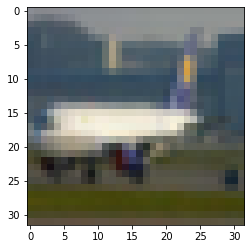

In [7]:
index=93
plt.imshow(all_imgs[:,:,:,index].permute(1,2,0))
print(class_names[cifar10[index][1]])

### Normalizing data

In [8]:
mean=all_imgs.view(3,-1).mean(dim=1)
std=all_imgs.view(3,-1).std(dim=1)
print(mean,std)
transformed_cifar10=datasets.CIFAR10(data_path,train=True,download=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=mean,std=std)]))
transformed_cifar10_val=datasets.CIFAR10(data_path,train=False,download=False,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=mean,std=std)]))

tensor([0.4914, 0.4822, 0.4465]) tensor([0.2470, 0.2435, 0.2616])


##### Some tests

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x7fdff8c4f550>, 'airplane')

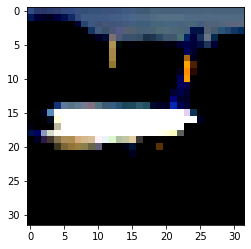

In [9]:
img_t,label=transformed_cifar10[index]
plt.imshow(img_t.permute(1,2,0)),class_names[label]

### Extracting birds and airplanes data

In [10]:
# class_names[0] --> airplane
# class_names[2] --> bird
labels=['airplane','bird']
cifar2=[(img,4%(label+1)) for img,label in transformed_cifar10 if label in [0,2]]
cifar2_val=[(img,4%(label+1)) for img,label in transformed_cifar10_val if label in [0,2]]

##### Some tests:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10000 2000


(<matplotlib.image.AxesImage at 0x7fdff8963750>, 'airplane')

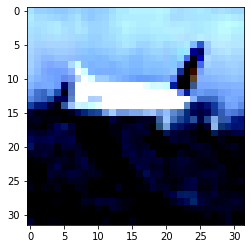

In [11]:
index=35
print(len(cifar2),len(cifar2_val))
plt.imshow(cifar2[index][0].permute(1,2,0)),labels[cifar2[index][1]]

### Building the Neural network 😊 


In [12]:
n_input=3*32*32
n_out=2
n_hidden=512
model=nn.Sequential(
    nn.Linear(n_input,2048),
     nn.Tanh(),
    nn.Linear(2048,1024),
     nn.Tanh(),
    nn.Linear(1024,512),
     nn.Tanh(),
    nn.Linear(512,128),
    nn.Tanh(),
    nn.Linear(128,n_out),
    nn.LogSoftmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


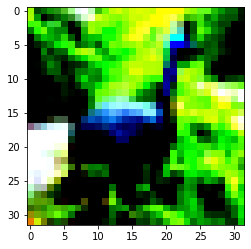

In [12]:
img,label=cifar2[0]
plt.imshow(img.permute(1,2,0))
plt.show()

In [13]:
Loss=nn.NLLLoss()
img_batch=img.view(-1).unsqueeze(0)
img_batch.shape
out=model(img_batch)
y=Loss(out,torch.tensor([label]))
out,y

(tensor([[-0.7893, -0.6055]], grad_fn=<LogSoftmaxBackward0>),
 tensor(0.6055, grad_fn=<NllLossBackward0>))

In [14]:
learning_rate=1e-2
loss_fn=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,shuffle=False)
n_epochs=100
for epoch in range(n_epochs):
  for imgs,labels in train_loader:
    batch_size = imgs.shape[0]
    out = model(imgs.view(batch_size, -1))
    target=labels
    loss=loss_fn(out,target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # for img,label in cifar2_val:
  #   out=model(img.view(-1).unsqueeze(0))
  #   target=torch.tensor([label])
  #   loss_val=loss_fn(out,target)
  print('epoch: %d loss: %f loss_val: %f'%(epoch+1,float(loss),float(loss_val)))

KeyboardInterrupt: ignored

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,shuffle=False)

correct = 0
total = 0
with torch.no_grad():
  for imgs, labels in val_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
  print("Accuracy: %f", correct / total)

In [ ]:
numel_list=[p.numel() for p in model.parameters() if (p.requires_grad==True)]
sum(numel_list),numel_list

In [ ]:
loader = torch.utils.data.DataLoader(cifar2, batch_size=64,shuffle=False)

correct = 0
total = 0
with torch.no_grad():
  for imgs, labels in loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())
  print("Accuracy: %f", correct / total)

In [13]:
conv=nn.Conv2d(3,16,kernel_size=5,padding=2)
conv

Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))

In [14]:
conv.weight.shape,conv.bias.shape

(torch.Size([16, 3, 5, 5]), torch.Size([16]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 16, 32, 32])

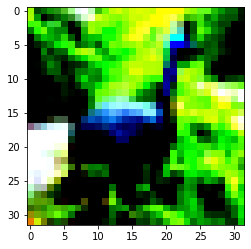

In [15]:
img,_=cifar2[0]
plt.imshow(img.permute(1,2,0))
img_c=conv(img.unsqueeze(0))
img_c.shape

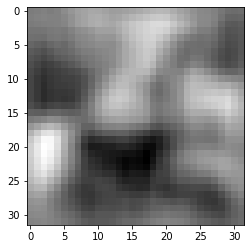

In [16]:
with torch.no_grad():
  conv.bias.zero_()
  conv.weight.fill_(1.0/9.0)
img_c=conv(img.unsqueeze(0))
plt.imshow(img_c[0,0].detach(),cmap='gray')

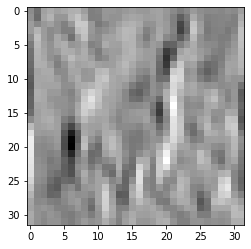

In [17]:
img,_=cifar2[0]
conv2=nn.Conv2d(3,1,kernel_size=3,padding=1)
with torch.no_grad():
  conv2.weight[:]=torch.tensor([[-1.0,0.0,1.0],[-1.0,0.0,1.0],[-1.0,0.0,1.0]])
  conv2.bias.zero_()

output=conv2(img.unsqueeze(0))
plt.imshow(output[0,0].detach(),cmap='gray')

(torch.Size([1, 3, 16, 16]), torch.Size([1, 1, 16, 16]))

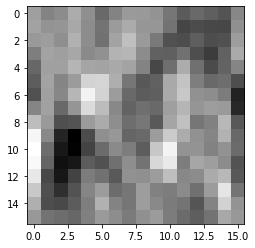

In [18]:
pool=nn.MaxPool2d(2)
img_p=pool(img.unsqueeze(0))
img_c=conv2(img_p)
plt.imshow(img_c[0,0].detach(),cmap='gray')
img_p.shape,img_c.shape

In [19]:
from torch.nn.modules.pooling import MaxPool2d
model=nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16,8,kernel_size=3,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Linear(8*8*8,32),
    nn.Tanh(),
    nn.Linear(32,2),
    nn.Tanh()
)

In [20]:
numel_list=[p.numel() for p in model.parameters()]
sum(numel_list),numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [21]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.act1 = nn.Tanh()
    self.pool1 = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
    self.act2 = nn.Tanh()
    self.pool2 = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(8 * 8 * 8, 32)
    self.act3 = nn.Tanh()
    self.fc2 = nn.Linear(32, 2)
  
  def forward(self,x):
    out = self.pool1(self.act1(self.conv1(x)))
    out = self.pool2(self.act2(self.conv2(out)))
    out = out.view(-1, 8 * 8 * 8)
    out = self.act3(self.fc1(out))
    out = self.fc2(out)
    return out
    



In [22]:
model=Net()
numel_list=[p.numel() for p in model.parameters()]
sum(numel_list),numel_list


(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [46]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,30,kernel_size=3,padding=1)
    self.conv1_dropout = nn.Dropout2d(p=0.4)
    self.conv2=nn.Conv2d(30,8,kernel_size=3,padding=1)
    self.conv2_dropout = nn.Dropout2d(p=0.4)
    self.linear1=nn.Linear(8*8*8,32)
    self.linear2=nn.Linear(32,2)
  def forward(self,x):
    out=nn.functional.max_pool2d(torch.tanh(self.conv1(x)),2)
    out=self.conv1_dropout(out)
    out=nn.functional.max_pool2d(torch.tanh(self.conv2(out)),2)
    out=self.conv2_dropout(out)
    out=out.view(-1,8*8*8)
    out=torch.tanh(self.linear1(out))
    out=self.linear2(out)
    return out

In [37]:
model=Net()
out=model(img.unsqueeze(0))
out

tensor([[-0.1358, -0.0654]], grad_fn=<AddmmBackward0>)

In [25]:


import datetime

In [47]:

def training_loop(n_epochs,optimizer,model,loss_fn,train_loader):
  for i in range(1,n_epochs+1):
    loss_train=0.0
    for imgs,labels in train_loader:
      imgs=imgs.to(device="cuda")
      labels=labels.to(device='cuda')
      outputs=model(imgs)
      loss=loss_fn(outputs,labels)
      l2_lambda = 0.001
      l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
      loss = loss + l2_lambda * l2_norm
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      loss_train+=loss.item()
    if i==1 or i%10==0:
      print('{} Epoch: {} Training Loss: {}'.format(datetime.datetime.now(),i,loss_train/len(train_loader)))



In [48]:

model=Net().to(device="cuda")
# model.cuda()
train_loader=torch.utils.data.DataLoader(cifar2,batch_size=64,shuffle=True)
optimizer=optim.SGD(model.parameters(),lr=1e-2)
loss_fn=nn.CrossEntropyLoss()

training_loop(500,optimizer=optimizer,model=model,loss_fn=loss_fn,train_loader=train_loader)

2022-08-08 01:07:35.499114 Epoch: 1 Training Loss: 0.6075721608985002
2022-08-08 01:07:40.658501 Epoch: 10 Training Loss: 0.4231931126801072
2022-08-08 01:07:46.416497 Epoch: 20 Training Loss: 0.39371905044005934
2022-08-08 01:07:51.947378 Epoch: 30 Training Loss: 0.38312316624222287
2022-08-08 01:07:57.441410 Epoch: 40 Training Loss: 0.3748724248948371
2022-08-08 01:08:02.978709 Epoch: 50 Training Loss: 0.3658756157205363
2022-08-08 01:08:08.493336 Epoch: 60 Training Loss: 0.3564573784542691
2022-08-08 01:08:13.902967 Epoch: 70 Training Loss: 0.34737690694772516
2022-08-08 01:08:19.395948 Epoch: 80 Training Loss: 0.3401486822374307
2022-08-08 01:08:24.878371 Epoch: 90 Training Loss: 0.33739198772770584
2022-08-08 01:08:30.303308 Epoch: 100 Training Loss: 0.32025001259746066
2022-08-08 01:08:35.744788 Epoch: 110 Training Loss: 0.3175843946493355
2022-08-08 01:08:41.203397 Epoch: 120 Training Loss: 0.31570361715972806
2022-08-08 01:08:47.320166 Epoch: 130 Training Loss: 0.30851744789226

In [49]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
shuffle=False)
def validate(model, train_loader, val_loader):
  for name, loader in [("train", train_loader), ("val", val_loader)]:
    correct = 0
    total = 0
    with torch.no_grad():
      for imgs, labels in loader:
        imgs=imgs.to(device="cuda")
        labels=labels.to(device="cuda")
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    print("Accuracy {}: {:.2f}".format(name , correct / total))
validate(model, train_loader, val_loader)


Accuracy train: 0.93
Accuracy val: 0.88


In [29]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [34]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path+ 'birds_vs_airplanes.pt'))
loaded_model(img.unsqueeze(0))

tensor([[-4.0399,  4.1984]], grad_fn=<AddmmBackward0>)

In [33]:
device=[torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')]
print(f'training on device {device}')

training on device [device(type='cuda')]
